In [1]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import csv
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from scipy.sparse import coo_matrix
from gensim.models.keyedvectors import KeyedVectors
from gensim.test.utils import common_texts,get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Doc2Vec
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\maria\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
C:\Users\maria\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data =pd.read_csv('train.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52419 entries, 0 to 52418
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pmid            52419 non-null  int64  
 1   journal         52418 non-null  object 
 2   title           52418 non-null  object 
 3   abstract        31500 non-null  object 
 4   keywords        27653 non-null  object 
 5   label           41286 non-null  object 
 6   pub_type        52417 non-null  object 
 7   authors         51882 non-null  object 
 8   date1           0 non-null      float64
 9   doi             51253 non-null  object 
 10  date2           52419 non-null  object 
 11  label_category  52419 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.8+ MB


In [5]:
data['date1'].unique()

array([nan])

In [6]:
data_test=pd.read_csv('test.csv')

In [7]:
result = pd.concat([data, data_test], axis=0)

In [8]:
result=result[result['abstract'].str.len()>30]

In [9]:
result=result.reset_index().drop(columns='index')

In [10]:
result['abstract']=result['abstract'].astype(str)

In [11]:
result=result.reset_index().drop(columns='index')

In [12]:
result.shape

(39625, 12)

In [13]:
labels = result[['label']]

labels2 = pd.concat([labels.drop('label', 1), labels['label'].str.get_dummies(sep=";")], 1)

In [14]:
#definimos las stop words
stop_words = set(stopwords.words("english"))##Creating a list of custom stopwords
new_words = ["ha", "become", "put", "large", "also", "since", "one", "two", "new", "previously", "shown","ng","background","describe","recent","despite","wa","objective"]
stop_words = stop_words.union(new_words)

In [15]:
result['abstract']

0        Coronavirus disease 2019 (COVID-19) has become...
1        This paper uses resilience as a lens through w...
2        Pulmonary embolism remains an important cause ...
3        The months from March to June refer as water c...
4        BACKGROUND: The novel coronavirus disease 2019...
                               ...                        
39620    During the COVID-19 epidemic, it is important ...
39621    COVID-19 patients can recover with a median SA...
39622    For the last 50 years we have known of a broad...
39623    The impacts of the COVID-19 pandemic affect al...
39624    Our work has been carried out with the aim of ...
Name: abstract, Length: 39625, dtype: object

In [17]:
corpus2 = []
for i in range(0, 39000):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', result['abstract'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    tagged = nltk.pos_tag(text)

    x1 = [(i,j.replace('VBD','r').replace('NNS','n').replace('NN','n').replace('JJ','a').replace('VB','v').replace('vP','v').replace('vN','v').replace('IN','n').replace('RB','a').replace('DT','n').replace('MD','v').replace('aR','n').replace('CC','n').replace('vG','v').replace('TO','n').replace('vZ','v').replace('CD','n').replace('aS','r').replace('W','n').replace('PRP','n').replace('EX','n').replace('Fn','n').replace('nP','n').replace('RP','n').replace('na','n').replace('Pn','n').replace('n$','n').replace('nn','n').replace('nS','n').replace('UH','n').replace('$','n').replace('POS','n').replace('SYM','n').replace('','n').replace('nnn','n').replace('nan','n').replace('nvn','n').replace('nrn','n').replace("n'n'n",'n')) for i,j in tagged]
    ##Remove stop words
    text1=[]
    for word in text:
        if word not in stop_words:
            text1.append(word)
     #Lemmatisation
    lem = WordNetLemmatizer()
    text2 = []
    for word in text1:
        if x1[text.index(word)][1] =='n':
            text2.append(lem.lemmatize(word, pos=x1[text.index(word)][1]))
#     text = [lem.lemmatize(word, pos=x1[i][1]) for word in text if not word in stop_words] 
    text2 = " ".join(text2)
    corpus2.append(text2)

In [18]:
d2vtrain=[TaggedDocument((doc),tags=[str(i)])for i, doc in enumerate(corpus2)]

In [36]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus2)]
model = Doc2Vec(documents, dm=1,dm_mean=1,vector_size=5, window=2, min_count=1, workers=4)

In [37]:
fname = get_tmpfile("my_doc2vec_model")
model.save(fname)
model = Doc2Vec.load(fname)  # you can continue training with the loaded model!

In [39]:
lista =[]
for i in range(0,39000):
    lista.append(model[i])

In [40]:
similar_to = 1864
similar_abstract = model.dv.most_similar(similar_to)

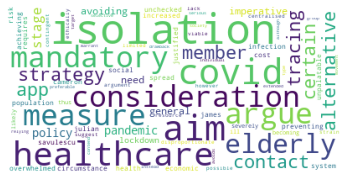

In [42]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42).generate(str(corpus2[2954]))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [49]:
to_predict_series = pd.Series(labels2.iloc[similar_to].to_numpy().T, index = results.columns)
to_predictdf=pd.DataFrame(columns = list(labels2.columns))
to_predictdf = to_predictdf.append(to_predict_series, ignore_index = True)
to_predictdf.index = [similar_to]

In [47]:
results=pd.DataFrame(columns = list(labels2.columns))
index_col = []
for i in range(0,10):
    i = similar_abstract[i][0]
    index_col.append(i)
    a_series = pd.Series(labels2.iloc[i].to_numpy().T, index = results.columns)
    results = results.append(a_series, ignore_index=True)

In [48]:
results.index = index_col

In [52]:
results

Case Report Diagnosis Epidemic Forecasting General Info Mechanism  \
34118           0         0                    0            0         0   
34049           0         1                    0            0         0   
35334           0         0                    0            0         1   
28827           0         0                    0            0         1   
38753           0         0                    0            0         0   
36251           1         0                    0            0         0   
34233           0         0                    0            0         0   
26887           0         0                    0            0         1   
32111           0         0                    0            0         1   
33672           0         0                    0            0         0   

      Prevention Transmission Treatment  
34118          1            0         0  
34049          0            0         0  
35334          0            0         0  
28827          0            0         0  
38753          1            0         0  
36251          0            0         0  
34233          1            0         0  
26887          0            0         1  
32111          0            0         0  
33672          1            0         0

In [53]:
results = pd.concat([to_predictdf,results])

In [54]:
for i in results.columns:
    results[i] = pd.to_numeric(results[i])
results.index = results.index.astype(str)

In [56]:
import matplotlib.pyplot as plt
import plotly.express as px

In [57]:
px.imshow(results.T)

In [61]:
lista=np.array(lista)

In [62]:
scaler = StandardScaler()
scaler.fit(lista)

lista_norm = scaler.transform(lista)

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [64]:
import matplotlib.pyplot as plt

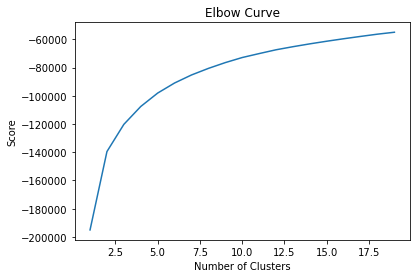

In [65]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(lista_norm).score(lista_norm) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [67]:
kmeans = KMeans(n_clusters=8).fit(lista_norm)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.21712092 -0.8201403  -1.0284591  -0.27449217 -1.3461844 ]
 [ 0.90492606 -0.2896718   0.5843434  -0.40708145 -0.4266192 ]
 [-0.14559482 -0.49040803 -0.49339443  1.5190455  -0.4752877 ]
 [ 0.9587181  -1.1866952  -0.8937128  -0.17173228 -0.05289088]
 [ 0.5214065   0.6884261   1.122262   -0.07838477  0.9448744 ]
 [-1.3656034   1.5271614   0.8154874   0.83614796  0.7053286 ]
 [-0.5331784   0.13091618 -0.6074724  -0.05396496  0.7225407 ]
 [-0.69934356  1.0514185   0.9454134  -0.8980912  -0.12269722]]


In [68]:
labels=kmeans.labels_

In [69]:
labels2=labels2[:39000]

In [74]:
labels2


Case Report  Diagnosis  Epidemic Forecasting  General Info  Mechanism  \
0                0          0                     0             0          1   
1                0          0                     0             0          0   
2                0          0                     0             0          0   
3                0          0                     0             0          0   
4                0          1                     0             0          0   
...            ...        ...                   ...           ...        ...   
38995            0          1                     0             0          0   
38996            0          0                     0             0          1   
38997            0          0                     0             0          0   
38998            0          0                     0             0          0   
38999            0          0                     0             0          0   

       Prevention  Transmission  Treatment  cluster  
0               0             0          1        4  
1               0             0          0        4  
2               1             0          0        4  
3               0             0          0        7  
4               0             0          1        6  
...           ...           ...        ...      ...  
38995           0             0          1        3  
38996           0             0          1        0  
38997           1             0          0        0  
38998           1             0          0        0  
38999           0             0          0        0  

[39000 rows x 9 columns]

In [73]:
labels2['cluster']=labels

In [79]:
labels2.groupby('cluster').mean()

Case Report  Diagnosis  Epidemic Forecasting  General Info  \
cluster                                                               
0           0.051000   0.213211              0.027410      0.004269   
1           0.071986   0.229711              0.023939      0.004924   
2           0.044232   0.175924              0.019603      0.003518   
3           0.079722   0.236967              0.016926      0.002200   
4           0.066402   0.227730              0.019172      0.003040   
5           0.050000   0.158505              0.023711      0.003351   
6           0.086746   0.213157              0.014189      0.004515   
7           0.062769   0.222298              0.017902      0.004305   

         Mechanism  Prevention  Transmission  Treatment  
cluster                                                  
0         0.096608    0.427994      0.046506   0.195462  
1         0.148896    0.348048      0.039049   0.297963  
2         0.157577    0.413420      0.033928   0.289771  
3         0.160968    0.324983      0.028775   0.336324  
4         0.204115    0.290858      0.032266   0.400748  
5         0.152062    0.383763      0.033763   0.265722  
6         0.159948    0.330216      0.025959   0.311512  
7         0.115794    0.386132      0.036710   0.240426

In [80]:
import seaborn as sns

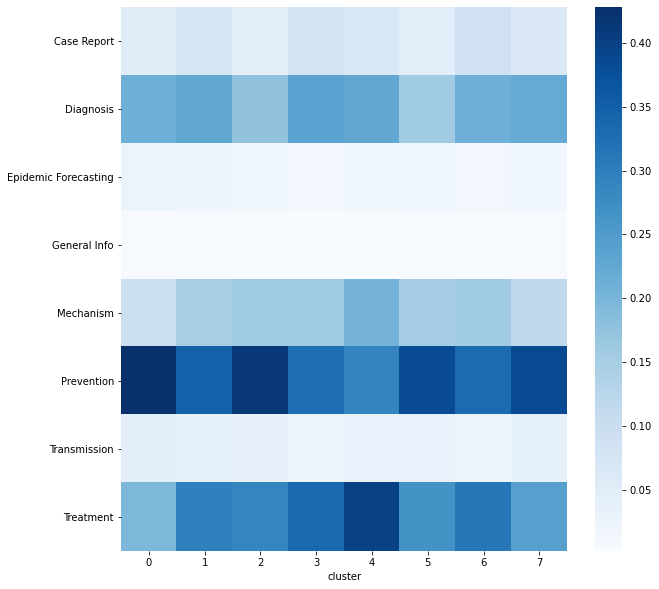

In [97]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(labels2.groupby('cluster').mean().T, cmap='Blues')

In [93]:
labels
label_0 = np.where(labels == 0)
corpus_np = np.array(corpus2)

In [98]:
label_0 = np.where(labels == 0)
label_1 = np.where(labels == 1)
label_2 = np.where(labels == 2)
label_3 = np.where(labels == 3)
label_4 = np.where(labels == 4)
label_5 = np.where(labels == 5)
label_6 = np.where(labels == 6)
label_7 = np.where(labels == 7)
cluster0 = corpus_np[label_0]
cluster1 = corpus_np[label_1]
cluster2 = corpus_np[label_2]
cluster3 = corpus_np[label_3]
cluster4 = corpus_np[label_4]
cluster5 = corpus_np[label_5]
cluster6 = corpus_np[label_6]
cluster7 = corpus_np[label_7]

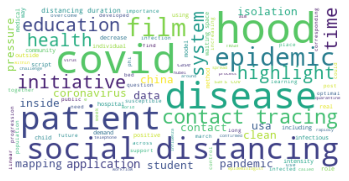

In [99]:
#Word cloud
# matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42).generate(str(cluster0))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

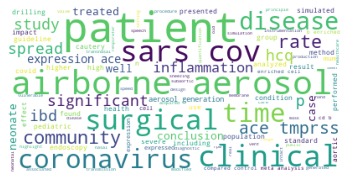

In [100]:
#Word cloud
# matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42).generate(str(cluster1))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

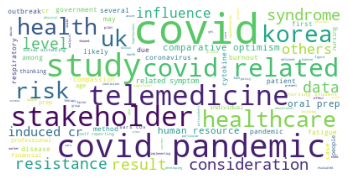

In [101]:
#Word cloud
# matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42).generate(str(cluster2))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

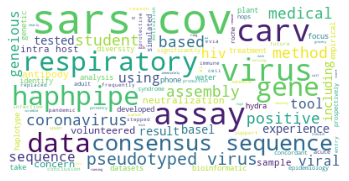

In [102]:
#Word cloud
# matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42).generate(str(cluster3))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

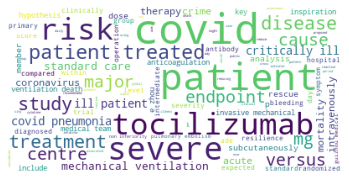

In [103]:
#Word cloud
# matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42).generate(str(cluster4))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

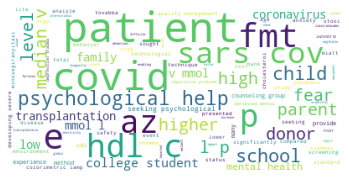

In [104]:
#Word cloud
# matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42).generate(str(cluster5))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

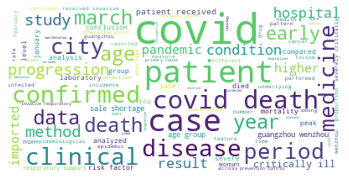

In [105]:
#Word cloud
# matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42).generate(str(cluster6))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

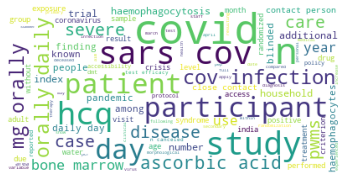

In [106]:
#Word cloud
# matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42).generate(str(cluster7))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)